<a href="https://colab.research.google.com/github/allanstar-byte/Autolib-electric-car-sharing-service-company-to-investigate-a-claim-about-the-blue-cars/blob/main/Autolib_electric_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autolib electric car-sharing service company to investigate a claim about the blue cars**

## **1.importing the libraries**

In [125]:
# Import the neccessary libarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **2. Importing the dataset**

In [126]:
auto = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
auto.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## **3. Data cleaning**

In [127]:
# identifyin the data type
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


### **a) Consistency**

In [128]:
#renaing the postal code column to remove the spacing 
auto.rename(columns={'Postal code': 'Postal_code'}, inplace=True)

### **b) missing data**

In [129]:
# identifying the null values
auto.isna().sum()

Postal_code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

### **c) Anomalies**

In [130]:
#identifying and removing duplicated values
auto.duplicated().sum()

0

### **d) Outliers**

In [131]:
# identifying outliers usin kurtosis
auto.kurt()

Postal_code               -0.542143
n_daily_data_points       36.594846
dayOfWeek                 -1.260994
BlueCars_taken_sum         6.172692
BlueCars_returned_sum      6.186288
Utilib_taken_sum           7.702362
Utilib_returned_sum        7.936357
Utilib_14_taken_sum        7.186815
Utilib_14_returned_sum     7.185463
Slots_freed_sum            6.454514
Slots_taken_sum            6.442553
dtype: float64

In [132]:
#removing outliers
def autolib_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

auto_1 =autolib_data(auto)
auto_1.head()


capping the  Postal_code
capping the  date
capping the  n_daily_data_points
capping the  dayOfWeek
capping the  day_type
capping the  BlueCars_taken_sum
capping the  BlueCars_returned_sum
capping the  Utilib_taken_sum
capping the  Utilib_returned_sum
capping the  Utilib_14_taken_sum
capping the  Utilib_14_returned_sum
capping the  Slots_freed_sum
capping the  Slots_taken_sum


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithC

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75002,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75002,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75002,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75002,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75002,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [243]:
auto_1.shape

(16085, 13)

## **4. Exploratory Data Analysis**

In [244]:
# summary of the data
auto.describe()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.206590,1431.518122,2.969599,124.642275,124.666459,3.650233,3.649611,8.496550,8.494374,22.271309,22.290084
std,7647.234667,31.810943,2.008378,179.512635,179.715689,5.578208,5.578670,12.371536,12.367288,50.507009,50.608861
min,75002.000000,1203.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95870.000000,1440.000000,6.000000,846.000000,852.000000,27.000000,27.000000,60.000000,60.000000,223.000000,225.000000


### **i) univariate analysis**

Text(0.5, 1.0, 'Daily data points')

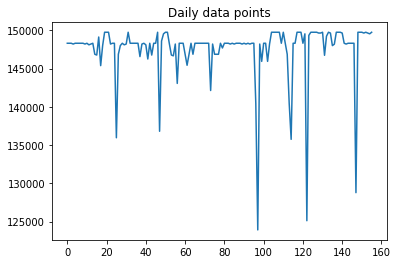

In [133]:
#grouping by the date 
auto_2 = auto_1.groupby('date').sum()
auto_3 = auto_2.reset_index()
auto_3

# ploting te trend for the daily data points 
plt.plot(auto_3['n_daily_data_points'])
plt.title('Daily data points')

the daily data points are exhibiting variations. in some cases the varions are large which may be seasonal variations. There is also a trend of the daily data moving up and down

Text(0.5, 1.0, 'blue cars returned')

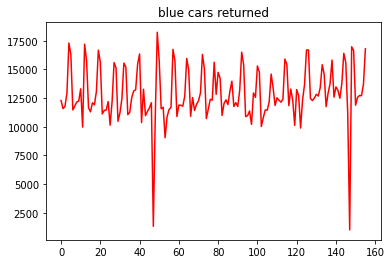

In [134]:
# plotting the trend for the blue cars
plt.plot(auto_3['BlueCars_returned_sum'], color='red')
plt.title('blue cars returned')

the blue cars are showing a trend between 1000 and 17500 count points

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

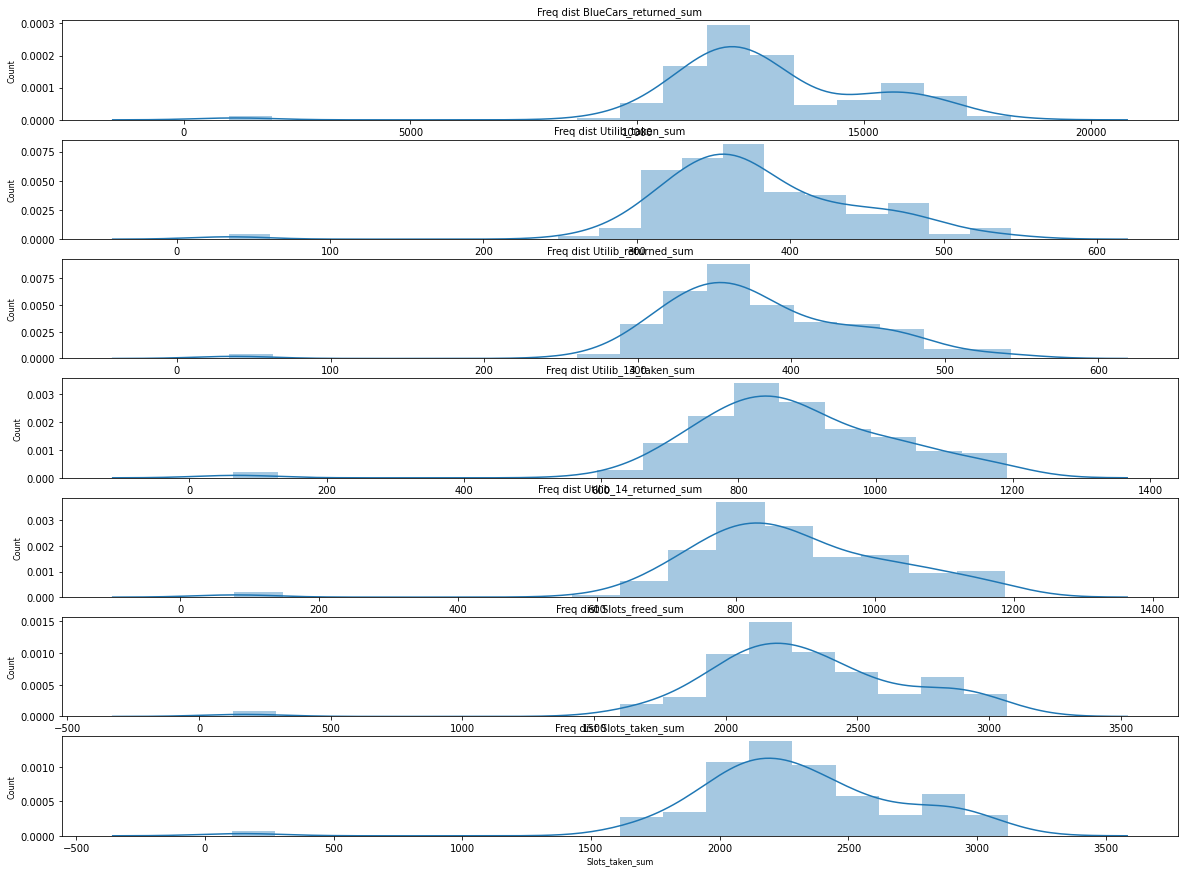

In [135]:
# Ploting the univariate summaries and recording our observations
#
col_names = ['BlueCars_returned_sum',	'Utilib_taken_sum',	'Utilib_returned_sum', 'Utilib_14_taken_sum',
             'Utilib_14_returned_sum', 'Slots_freed_sum',	'Slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(20,15))

for i, col_val in enumerate(col_names):

    sns.distplot(auto_3[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

The dataset most of the variables are left tailed exhibiting a negative skew.

In [136]:
# counting the day type that has been on peak
print(auto_1.groupby(['day_type']).day_type.value_counts())

day_type  day_type
weekday   weekday     11544
weekend   weekend      4541
Name: day_type, dtype: int64


week days are the ones which have the most accurences of 11544 compared to the weekends with a value count of 4542

### **ii) Bivariate analysis**

Text(0, 0.5, 'su of the blue cars')

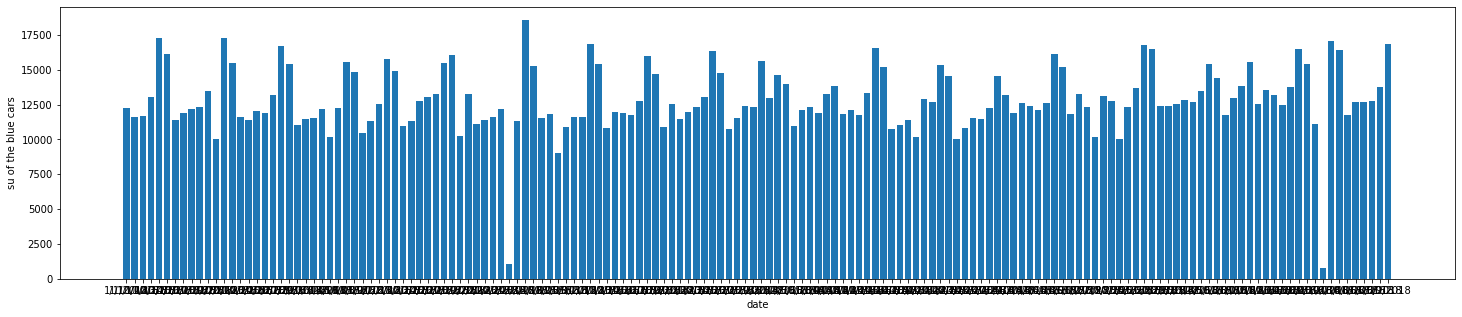

In [137]:
#ploting for the sum of blue cars taken over the time
plt.figure(figsize=(25,5))
plt.bar(auto_3['date'], auto_3['BlueCars_taken_sum'])
plt.xlabel('date')
plt.ylabel('su of the blue cars')

The sum of cars taken show some consistecy over the period. it only shows few points with extreme low and high cases

Text(0, 0.5, 'slota freed')

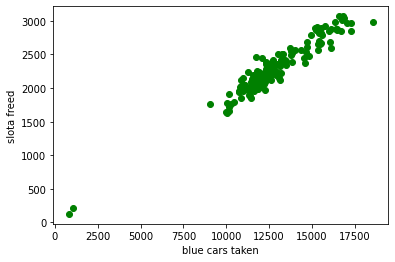

In [138]:
# examining relationship between the blue cars taken and the space freed
plt.scatter(auto_3['BlueCars_taken_sum'], auto_3['Slots_freed_sum'], color='green')
plt.xlabel('blue cars taken')
plt.ylabel('slota freed')

There is a correlation between the blue cars taken and the slots freed
 

## **5. Hypothesis testing**

### **a)Normalty test**

For the normality test the hypothesis will be:

Ho = the data is normally distributed

H1 = the data is not normally distributed


#### **i) Normality test using Shapiro- Wilk Test: tests if data is normally distributed**

Assumption: Observations are identically distributed that is, all the observations have an equal probability to occur

In [163]:
# doing a single out of the weekdays only
auto_n = auto_1.loc[auto_1['day_type'] == 'weekday']
r = auto_n.groupby('date').sum()
#reseting the index
autol = r.reset_index()
autol.head()

,date,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,1/1/2018,9144919,148320,0,12282,12284,372,369,866,841,1964,1951
1,1/10/2018,9144919,148320,206,11637,11582,341,337,768,773,1949,1924
2,1/11/2018,9144919,148320,309,11713,11769,355,354,738,746,1982,1990
3,1/12/2018,9144919,148217,412,13064,12924,359,356,845,822,2156,2158
4,1/15/2018,9144919,148320,0,11390,11461,343,347,789,796,1884,1852


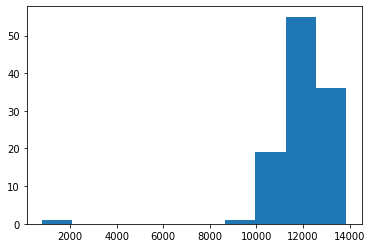

In [164]:
#plotting histogram for the bluecars taken
from matplotlib import pyplot
pyplot.hist(autol['BlueCars_taken_sum'])
pyplot.show()

from the histogram the data is not normally distributed since its right skewed. Its should have been symetric around the mean. To prove this we will use shapiro wilk test in the code below

In [246]:
#conducting the shapiro wilk test
from scipy.stats import shapiro

dataTested = auto_3['BlueCars_taken_sum']

stat, p = shapiro(dataTested)
print('stat-%.2f, p-%.30f' % (stat, p))
#specifying by using a alpha value of 5%
if p > 0.05:
  print('Normal distribution')
else:
  print('Not a normal ditribution')


stat-0.87, p-0.000000000136620256774300230518
Not a normal ditribution


From the shapiro wilk test we have proved that the data is not normally distributed having a very low p-value of 0.000000000136620256774300230518 and hence not a normal distribution. Thus the alternative hypothesis is adopted.

In [166]:
# generatin a normally distributed data from python
from numpy.random import randn
dataTested = randn(100)
dataTested

array([ 0.08560057,  1.11797212, -0.20139301,  0.2117387 ,  1.07998627,
        0.52030972,  0.76006363,  0.42266537, -0.27841848,  0.79936119,
        1.38856199,  0.83886697, -0.93140402, -2.35330269,  0.50129586,
       -1.55021625,  0.09057774,  1.61990887,  0.94422586, -0.85518748,
        0.13218898,  0.47274405,  0.07116797,  1.33555533, -0.70998448,
       -0.88195168,  0.3944867 ,  0.48550533,  2.47440525,  0.29636534,
       -0.14749605, -1.16196211,  0.23941798,  0.85408688, -0.63583765,
        1.19958276,  0.06892892, -0.91098443,  1.41239756,  0.37305405,
        0.65746512, -0.68653895, -0.09826962, -1.41704718, -0.38525639,
       -0.53121921,  0.77463473,  1.42879248,  0.3579875 , -0.38607858,
       -2.44889423,  2.02498193,  0.32896803, -1.28627228,  0.41817285,
       -0.36108387,  0.19426194, -0.10134298, -0.77189285, -1.2161694 ,
        0.78695441, -0.31466575, -0.02471199, -0.32608969, -1.30300624,
        0.60813604, -0.6213867 ,  1.0724338 ,  0.14738137, -0.58

In [167]:
#using the shapiro wilk test to test the norally distributed 
#random variables using randn
stat, p = shapiro(dataTested)
print('stat-%.2f, p-%.30f' % (stat, p))
#specifying by using a alpha value of 5%
if p > 0.05:
  print('Normal distribution')
else:
  print('Not a normal ditribution')

stat-0.99, p-0.836647212505340576171875000000
Normal distribution


at this point the p-value increases proving a normal distribution thus the null hypothesis is true (the data is normally distributed)

#### **ii) Normality test using K^2 Normality Test: test if the data is normally distributed**

Assumption: Observations are identically distributed

In [169]:
# D'Agostino's K^2 normality test
from scipy.stats import  normaltest
data = autol['BlueCars_taken_sum']

stat, p = normaltest(data)
print('stat-%.2f, p-%.30f' % (stat, p))
#specifying by using a alpha value of 5%
if p > 0.05:
  print('Normal distribution')
else:
  print('Not a normal ditribution')

stat-142.43, p-0.000000000000000000000000000000
Not a normal ditribution


### **b) Correlation test**

the hypothesis for the correlation will be:

Ho = there is no correlation between the blue cars taken and the slots freed

H1 = there is a correlation between the blue cars taken and the slots freed

Assumption: Identical and normal distribution

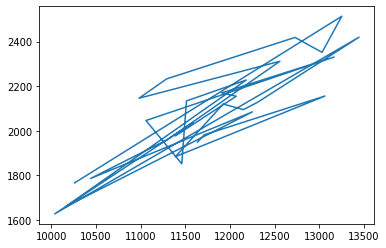

In [173]:
#plotting for the blue cars taken and the Slots_freed_sum
sample_1 = autol[1:30]['BlueCars_taken_sum']
sample_2 = autol[1:30]['Slots_freed_sum']

pyplot.plot(sample_1, sample_2)
pyplot.show()

there is no clear picture to deduce soe conclusions, for more clarity we will use the spearman rank correlation 


#### **spearmans rank correlation**

In [174]:
#spearmans rank correlation
from scipy.stats import spearmanr
stat, p = spearmanr(sample_1, sample_2)

print('stat-%.2f, p-%.30f' % (stat, p))
#specifying by using a alpha value of 5%
if p > 0.05:
  print('independent samples')
else:
  print('dependent samples')

stat-0.80, p-0.000000242460231543382547268951
dependent samples


the spersmans correlation proves that there is a correlation between the blue cars taken and the slots freed thus adopt the null hypothesis, since the p value is very low 0.000000242460231543382547268951

In [175]:
# the corelation matrix for the entire dataset
autol[1:30].corr(method='pearson')

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal_code,1.000000,0.190754,0.007688,-0.047486,-0.049504,-0.110018,-0.173631,0.083053,0.079868,0.068595,0.079036
n_daily_data_points,0.190754,1.000000,-0.152022,0.339729,0.342363,0.208976,0.119859,0.389895,0.382942,0.387039,0.378380
dayOfWeek,0.007688,-0.152022,1.000000,0.724035,0.709179,0.485841,0.477332,0.509751,0.490299,0.499640,0.498129
BlueCars_taken_sum,-0.047486,0.339729,0.724035,1.000000,0.997185,0.693145,0.662105,0.846788,0.827748,0.877675,0.866467
BlueCars_returned_sum,-0.049504,0.342363,0.709179,0.997185,1.000000,0.694884,0.666924,0.850262,0.834134,0.880555,0.870148
Utilib_taken_sum,-0.110018,0.208976,0.485841,0.693145,0.694884,1.000000,0.986355,0.629003,0.618784,0.535234,0.523041
Utilib_returned_sum,-0.173631,0.119859,0.477332,0.662105,0.666924,0.986355,1.000000,0.578804,0.574087,0.490742,0.474871
Utilib_14_taken_sum,0.083053,0.389895,0.509751,0.846788,0.850262,0.629003,0.578804,1.000000,0.994197,0.802465,0.801333
Utilib_14_returned_sum,0.079868,0.382942,0.490299,0.827748,0.834134,0.618784,0.574087,0.994197,1.000000,0.784863,0.782529
Slots_freed_sum,0.068595,0.387039,0.499640,0.877675,0.880555,0.535234,0.490742,0.802465,0.784863,1.000000,0.997484


### **c) Parametric test**

####**i) T Test**

##### **One-Sample T-test**

Ho = there is no difference between the sample and the population

H1 = there is a difference between the sample and the population

The test will tell us whether means of the sample and the population are different

In [177]:
#selectin the blue cars taken
blue_c = autol['BlueCars_taken_sum']

In [179]:
#obtaining the mean 
blue_mean = np.mean(blue_c)
blue_mean

11919.88392857143

In [182]:
# taking a random sample
sample_size = 100
blue_sample = np.random.choice(blue_c, sample_size)
blue_sample

array([11870, 11361, 11726, 11304, 10982, 13494, 13167, 12422, 12120,
       11303, 12562, 11042, 12305, 12763, 10158, 11474, 12766, 13233,
       12953, 12847, 11848, 13233, 11422, 12930, 11564, 11587, 13120,
       12375, 11608, 10727, 11474, 13859, 11585, 11456, 12344, 11060,
       12729, 12592, 11564, 11585, 11361, 11848, 11848, 11608, 11292,
       12953, 11304, 12953, 10832, 12766, 11541, 10886, 13494, 12189,
       12282, 12930, 13859, 11292, 10057, 12560, 11826, 11136, 10260,
       12561, 10170, 13725, 13167, 12305, 11390, 13520, 12128, 11587,
       12329, 12128, 10057, 13064, 13446, 12700, 11781, 11422, 11292,
         800, 10727, 12405, 12700, 11826, 12305, 12847, 10982, 13013,
       12555, 10832, 12953, 12375, 10889, 13282, 11042, 11587, 12555,
       13253])

In [192]:
#cunducting the ttest
from scipy.stats import ttest_1samp

ttest, p_value = ttest_1samp(blue_sample, 11919)
p_value

0.923813815922726

we're going to reject the null hypothesis sice the p value is greater than 0.05. Thus there is a significant difference between the sample and the population mean with a p-value of 0.923813815922726.

##### **Two-sample T-test**

The two saple ttest compares the eans of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

H0 = there is no statistical difference between the sample means and the population

H1 = there is a statistical difference between the sample means and the population

In [203]:
#carrying out the two tests for the blue cars returned and the blue cars taken
import scipy.stats as stats

blue_taken = autol['BlueCars_taken_sum']
blue_returned = autol['BlueCars_returned_sum']

_,p_value = stats.ttest_ind(a = blue_taken, b = blue_returned, equal_var=False)

if p_value < 0.05:
  print('Reject null hypothesis', p_value)
else: 
  print('adopt the null hypothesis', p_value)

adopt the null hypothesis 0.8701932846861928


From the results obtained there is no statistical difference between the sample mean and the population mean since the p value is greater than 0.05.Thus adopting the alternate hypothesis. with a p-value of 0.8701932846861928

#### **ii) Point estimation**

In [204]:
# scipy is python library will help us use statistical formulas in our code
import scipy.stats as stats
import random

In [224]:
#calculating the population mean for the blue cars taken
blue_cars_taken = autol['BlueCars_taken_sum']
blue_cars_taken.mean()

11919.88392857143

In [238]:
#specifying the sample 
sample_blue = blue_cars_taken[1:100]

In [239]:
# sample mean 
print(sample_blue.mean())

11935.222222222223


In [240]:
# calculating how much the estimated mean differs from the main mean
blue_cars_taken.mean() - sample_blue.mean()

-15.338293650793275

From this example we can see that based on a sample of 100 blue cars taken our estimator underestimates the true mean by -15.338293650793275. We can conclude that we can get a fairly accurate estimate of a large population from a fairly small subset.

### **d) non-parametric**

#### **Chi-squared goodness of fit**

H0 =  A variable follows a hypothesized distribution.

H1 = A variable does not follow a hypothesized distribution.

In [247]:
#creating arrays of blue cars taken and blue cars returned
taken = autol['BlueCars_taken_sum']
returned = autol['BlueCars_returned_sum']

In [248]:
import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=taken, f_exp=returned)


Power_divergenceResult(statistic=97.66374146509514, pvalue=0.8128461413277058)

Since the p-value (0.8128461413277058) is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the true distribution blue cars taken is different from the distribution of the cars returned.